## 导入包和加载数据

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [202]:
train=pd.read_csv('../input/train_xy.csv')
test=pd.read_csv('../input/test_all.csv')
train.shape,test.shape

((15000, 160), (10000, 159))

In [203]:
train.head()

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,0,0,0,0,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1


In [204]:
test.head()

,cust_id,cust_group,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,1,group_1,0.291667,0.555388,-99,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,2,2,2,3
1,2,group_3,0.270833,0.770302,0,0,0,0,1,1,...,1,1,1,1,1,1,2,2,1,10
2,3,group_3,0.354167,0.440327,0,0,0,0,4,3,...,1,1,1,1,1,1,1,1,3,3
3,4,group_1,0.208333,0.476509,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,4
4,5,group_1,0.125000,0.955286,0,0,0,0,2,1,...,1,1,1,1,1,1,1,1,1,10


## 统计类别标签

0    14309
1      691
Name: y, dtype: int64


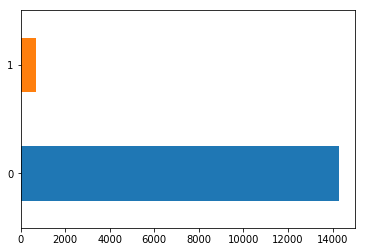

In [205]:
print(train['y'].value_counts())
train['y'].value_counts().plot(kind='barh')

类别太不均衡

## 统计每列缺失值（-99）

In [206]:
# 去除异常值
n_row=len(train)
print(n_row)
for col in train.columns:
    cnt=(train[col]==-99).astype(int).sum()
    print(col,cnt,float(cnt) / n_row)
    if (float(cnt) / n_row) > 0.45:
        
        train.drop([col], axis=1, inplace=True)
        test.drop([col],axis=1,inplace=True)
print(train.shape)
print(test.shape)

15000
cust_id 0 0.0
cust_group 0 0.0
y 0 0.0
x_1 0 0.0
x_2 0 0.0
x_3 7689 0.5126
x_4 7689 0.5126
x_5 7689 0.5126
x_6 7689 0.5126
x_7 7689 0.5126
x_8 7689 0.5126
x_9 7345 0.48966666666666664
x_10 7345 0.48966666666666664
x_11 7345 0.48966666666666664
x_12 7345 0.48966666666666664
x_13 7345 0.48966666666666664
x_14 7345 0.48966666666666664
x_15 7689 0.5126
x_16 7689 0.5126
x_17 7689 0.5126
x_18 7689 0.5126
x_19 7689 0.5126
x_20 7689 0.5126
x_21 7345 0.48966666666666664
x_22 7345 0.48966666666666664
x_23 7345 0.48966666666666664
x_24 7345 0.48966666666666664
x_25 7689 0.5126
x_26 7689 0.5126
x_27 7689 0.5126
x_28 7689 0.5126
x_29 7689 0.5126
x_30 7689 0.5126
x_31 7345 0.48966666666666664
x_32 7345 0.48966666666666664
x_33 7345 0.48966666666666664
x_34 7345 0.48966666666666664
x_35 7345 0.48966666666666664
x_36 7345 0.48966666666666664
x_37 7345 0.48966666666666664
x_38 7345 0.48966666666666664
x_39 128 0.008533333333333334
x_40 128 0.008533333333333334
x_41 128 0.008533333333333334
x_42 1

一共舍去了160-121=39个特征

In [207]:
train.head()

,cust_id,cust_group,y,x_1,x_2,x_39,x_40,x_41,x_42,x_43,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,6,9,10,7,9,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,7,8,7,7,3,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,2,1,3,6,5,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,2,2,3,7,9,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,2,9,11,10,9,...,1,1,1,1,1,1,1,1,2,1


## cust_group的数量统计

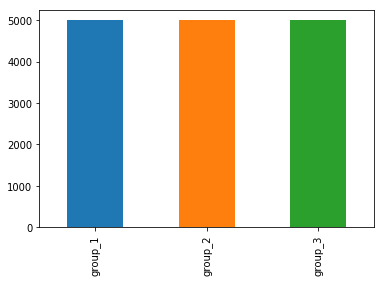

In [208]:
train['cust_group'].value_counts().plot(kind='bar')

## 类别标签为1数据

In [219]:
train[train['y']==1].head()

,cust_id,cust_group,y,x_1,x_2,x_39,x_40,x_41,x_42,x_43,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
46,110046,group_3,1,0.437500,0.743508,10,3,6,6,6,...,1,1,1,1,1,1,1,1,2,4
505,110505,group_3,1,0.229167,0.769781,2,5,1,9,9,...,1,1,1,1,1,1,1,1,2,2
938,110938,group_3,1,0.250000,0.860082,1,1,6,8,9,...,1,1,2,1,1,1,1,1,2,2
1401,111401,group_3,1,0.104167,0.643934,3,4,4,4,10,...,1,1,1,1,1,1,1,1,2,4
1889,111889,group_3,1,0.708333,0.699773,4,10,4,7,5,...,1,1,1,1,1,1,1,1,1,3


In [220]:
train.describe()

,cust_id,y,x_1,x_2,x_39,x_40,x_41,x_42,x_43,x_44,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,117499.500000,0.046067,0.247907,0.609766,2.006267,3.523200,3.554533,4.176000,5.376000,6.211600,...,0.712733,0.741933,0.788200,0.693333,0.693467,-2.112533,0.673533,0.676733,-4.009333,-37.337267
std,4330.271354,0.209636,0.136649,0.219441,9.651779,9.932561,9.815572,9.970546,10.050766,10.025923,...,5.533352,5.541111,5.546992,5.529436,5.529455,17.524016,7.175541,7.176048,23.919867,49.923298
min,110000.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,113749.750000,0.000000,0.145833,0.467884,1.000000,2.000000,2.000000,2.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,-99.000000
50%,117499.500000,0.000000,0.208333,0.612299,2.000000,4.000000,4.000000,5.000000,6.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,121249.250000,0.000000,0.312500,0.773963,4.000000,7.000000,6.000000,7.000000,9.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000
max,124999.000000,1.000000,0.895833,0.999992,10.000000,10.000000,15.000000,15.000000,10.000000,10.000000,...,3.000000,4.000000,4.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,11.000000


## 数据相关性分析

Index(['cust_id', 'cust_group', 'y', 'x_1', 'x_2', 'x_39', 'x_40', 'x_41',
       'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50',
       'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59',
       'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68',
       'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77',
       'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86',
       'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_95', 'x_96', 'x_97', 'x_98',
       'x_99', 'x_100', 'x_101', 'x_139', 'x_143', 'x_144', 'x_145', 'x_146',
       'x_147', 'x_148', 'x_149', 'x_150', 'x_151', 'x_152', 'x_153', 'x_154',
       'x_155', 'x_156', 'x_157'],
      dtype='object')


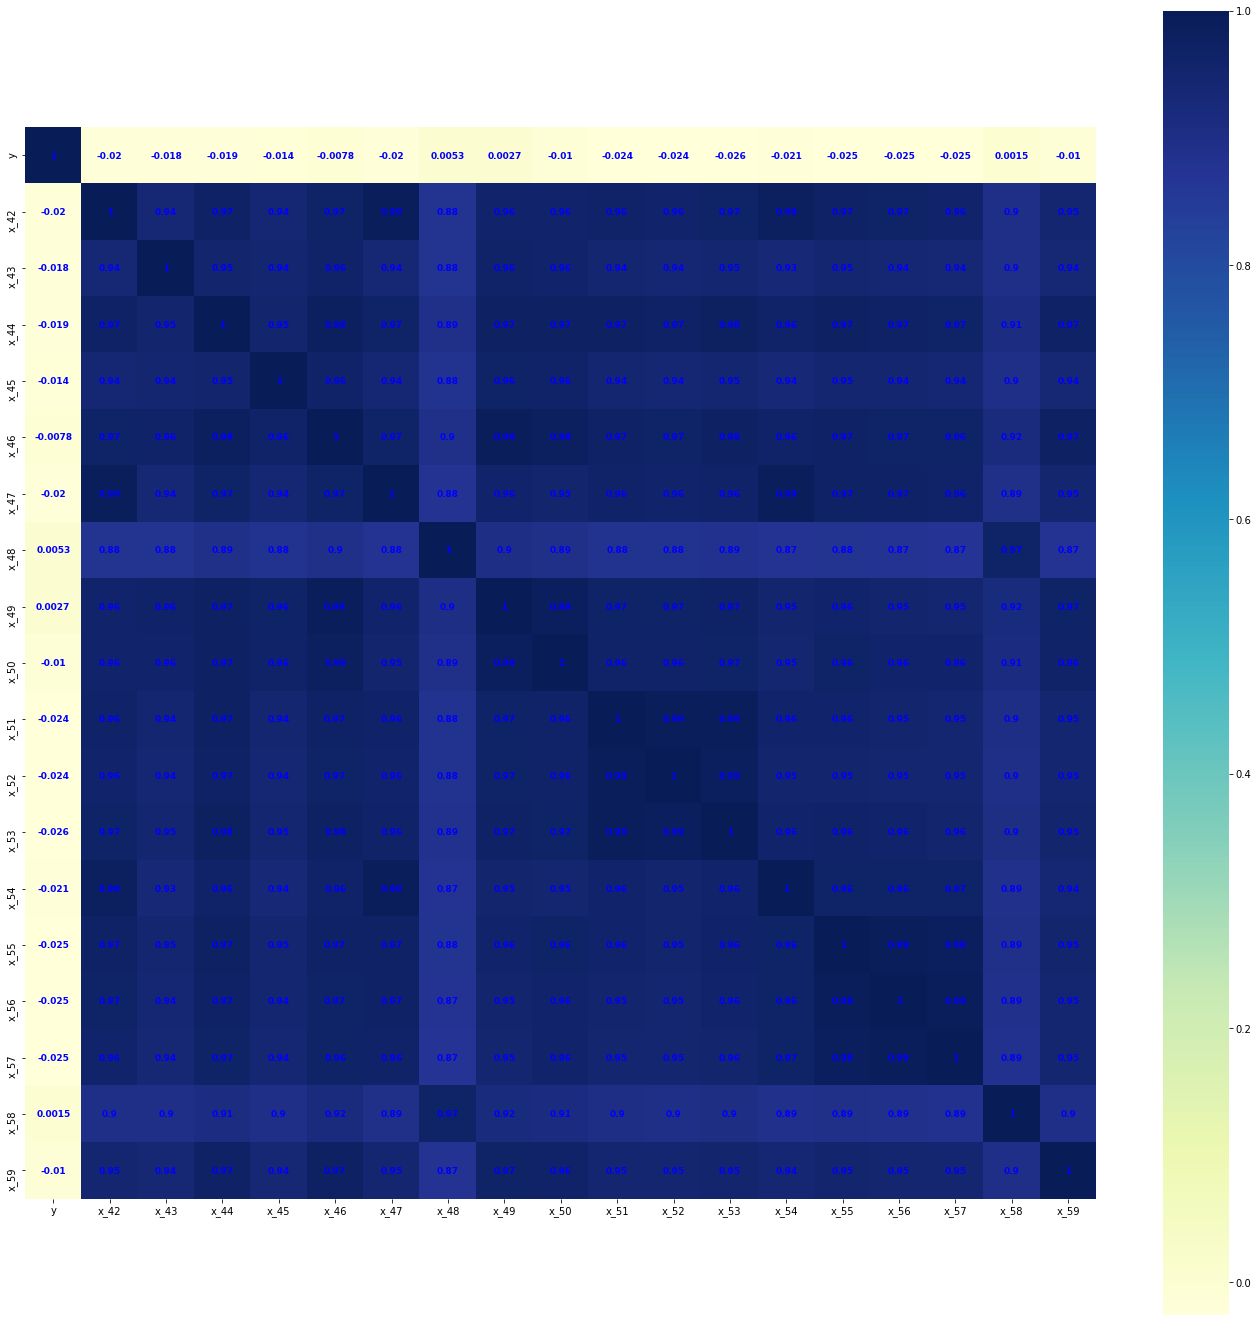

In [241]:
print(train.columns)
import seaborn as sns

fig, ax = plt.subplots(figsize=(24, 24))
corr = train[['y','x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50','x_51',
              'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59',]].corr()#计算各变量的相关性系数
sns.heatmap(corr, annot=True,cmap="YlGnBu", annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'},square=True)#绘制相关性系数热力图
plt.show()

## 构建数据集

In [210]:
y=train['y']
X=train.drop(['cust_id','y','cust_group'],axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(12000, 78) (3000, 78)


In [211]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
from math import sqrt

In [212]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [213]:
pred=clf.predict_proba(X_test)
print(pred[:,1])
pred=np.argmax(pred,axis=1)
print(sqrt(mean_squared_error(pred,y_test)))
print(roc_auc_score(pred,y_test))
print(pred)

[0.1096729  0.14802444 0.01757713 ... 0.04917707 0.00217969 0.00148953]
0.21291625896895083
0.7274849899933289
[0 0 0 ... 0 0 0]


In [214]:
eval_x=test.drop(['cust_id','cust_group'],axis=1,inplace=False)

In [215]:
submit_pred=clf.predict_proba(eval_x)
submit_pred=submit_pred[:,1]
submit_pred

array([0.00776907, 0.00532043, 0.02124375, ..., 0.08449827, 0.0079503 ,
       0.00248591])

In [216]:
test['pred_prob']=submit_pred
test[['cust_id','pred_prob']].to_csv('submit.csv',index=False)

In [217]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(fpr,'\n',tpr,'\n',thresholds)
print(metrics.auc(fpr,tpr))

[0.  0.5 0.5 1. ] 
 [0.5 0.5 1.  1. ] 
 [0.8  0.4  0.35 0.1 ]
0.75
